In [1]:
df = pd.read_pickle('data/df_feats.pkl')
print(df.shape)
df[:3]

(87599, 262)


,time,wind_dir,wind_dir_lag1,wind_dir_lag24,wind_dir_RM_lag1_WS3,wind_dir_S_RM_lag1_SL24_WS3,wind_dir_lag1to3,wind_dir_lag24to72,wind_speed,wind_speed_lag1,wind_speed_lag24,wind_speed_RM_lag1_WS3,wind_speed_S_RM_lag1_SL24_WS3,wind_speed_lag1to3,wind_speed_lag24to72,wind_gust,wind_gust_lag1,wind_gust_lag24,wind_gust_RM_lag1_WS3,wind_gust_S_RM_lag1_SL24_WS3,wind_gust_lag1to3,wind_gust_lag24to72,vis,vis_lag1,vis_lag24,vis_RM_lag1_WS3,vis_S_RM_lag1_SL24_WS3,vis_lag1to3,vis_lag24to72,temp,temp_lag1,temp_lag24,temp_RM_lag1_WS3,temp_S_RM_lag1_SL24_WS3,temp_lag1to3,temp_lag24to72,dewpt,dewpt_lag1,dewpt_lag24,dewpt_RM_lag1_WS3,dewpt_S_RM_lag1_SL24_WS3,dewpt_lag1to3,dewpt_lag24to72,press,press_lag1,press_lag24,press_RM_lag1_WS3,press_S_RM_lag1_SL24_WS3,press_lag1to3,press_lag24to72,vis_unclear_flg,vis_unclear_flg_lag1,vis_unclear_flg_lag24,vis_unclear_flg_RM_lag1_WS3,vis_unclear_flg_S_RM_lag1_SL24_WS3,vis_unclear_flg_lag1to3,vis_unclear_flg_lag24to72,wind_speed_flg,wind_speed_flg_lag1,wind_speed_flg_lag24,wind_speed_flg_RM_lag1_WS3,wind_speed_flg_S_RM_lag1_SL24_WS3,wind_speed_flg_lag1to3,wind_speed_flg_lag24to72,wind_gust_flg,wind_gust_flg_lag1,wind_gust_flg_lag24,wind_gust_flg_RM_lag1_WS3,wind_gust_flg_S_RM_lag1_SL24_WS3,wind_gust_flg_lag1to3,wind_gust_flg_lag24to72,wind_dir_flg,wind_dir_flg_lag1,wind_dir_flg_lag24,wind_dir_flg_RM_lag1_WS3,...,sky_flg_OVC_S_RM_lag1_SL24_WS3,sky_flg_OVC_lag1to3,sky_flg_OVC_lag24to72,sky_flg_CLR,sky_flg_CLR_lag1,sky_flg_CLR_lag24,sky_flg_CLR_RM_lag1_WS3,sky_flg_CLR_S_RM_lag1_SL24_WS3,sky_flg_CLR_lag1to3,sky_flg_CLR_lag24to72,sky_flg_CB,sky_flg_CB_lag1,sky_flg_CB_lag24,sky_flg_CB_RM_lag1_WS3,sky_flg_CB_S_RM_lag1_SL24_WS3,sky_flg_CB_lag1to3,sky_flg_CB_lag24to72,sky_flg_TCU,sky_flg_TCU_lag1,sky_flg_TCU_lag24,sky_flg_TCU_RM_lag1_WS3,sky_flg_TCU_S_RM_lag1_SL24_WS3,sky_flg_TCU_lag1to3,sky_flg_TCU_lag24to72,sky_avg_BKN,sky_avg_BKN_lag1,sky_avg_BKN_lag24,sky_avg_BKN_RM_lag1_WS3,sky_avg_BKN_S_RM_lag1_SL24_WS3,sky_avg_BKN_lag1to3,sky_avg_BKN_lag24to72,sky_avg_CB,sky_avg_CB_lag1,sky_avg_CB_lag24,sky_avg_CB_RM_lag1_WS3,sky_avg_CB_S_RM_lag1_SL24_WS3,sky_avg_CB_lag1to3,sky_avg_CB_lag24to72,sky_avg_CLR,sky_avg_CLR_lag1,sky_avg_CLR_lag24,sky_avg_CLR_RM_lag1_WS3,sky_avg_CLR_S_RM_lag1_SL24_WS3,sky_avg_CLR_lag1to3,sky_avg_CLR_lag24to72,sky_avg_FEW,sky_avg_FEW_lag1,sky_avg_FEW_lag24,sky_avg_FEW_RM_lag1_WS3,sky_avg_FEW_S_RM_lag1_SL24_WS3,sky_avg_FEW_lag1to3,sky_avg_FEW_lag24to72,sky_avg_OVC,sky_avg_OVC_lag1,sky_avg_OVC_lag24,sky_avg_OVC_RM_lag1_WS3,sky_avg_OVC_S_RM_lag1_SL24_WS3,sky_avg_OVC_lag1to3,sky_avg_OVC_lag24to72,sky_avg_SCT,sky_avg_SCT_lag1,sky_avg_SCT_lag24,sky_avg_SCT_RM_lag1_WS3,sky_avg_SCT_S_RM_lag1_SL24_WS3,sky_avg_SCT_lag1to3,sky_avg_SCT_lag24to72,sky_avg_TCU,sky_avg_TCU_lag1,sky_avg_TCU_lag24,sky_avg_TCU_RM_lag1_WS3,sky_avg_TCU_S_RM_lag1_SL24_WS3,sky_avg_TCU_lag1to3,sky_avg_TCU_lag24to72,dt_month,dt_hour
49,2014-01-03 01:00:00,230.00,230.00,110.00,230.00,126.67,1.00,0.87,5.00,5.00,6.00,5.67,6.67,0.88,0.90,18.00,18.00,18.00,18.00,17.00,1.00,1.06,10.00,10.00,10.00,10.00,10.00,1.00,1.00,23.00,24.00,24.00,25.00,23.67,0.96,1.01,20.00,19.00,22.00,19.00,19.67,1.00,1.12,29.96,29.95,30.09,29.94,30.08,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,1.00,1.00,1.00,1.00,...,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,000.00","3,000.00","1,200.00","3,033.33","1,500.00",0.99,0.80,0.00,0.00,0.00,0.00,833.33,0.00,0.00,0.00,0.00,0.00,0.00,"8,333.33",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,1
50,2014-01-03 02:00:00,220.00,230.00,120.00,233.33,126.67,0.99,0.95,4.00,5.00,6.00,5.00,6.67,1.00,0.90,18.00,18.00,18.00,18.00,17.00,1.00,1.06,10.00,10.00,10.00,10.00,10.00,1.00,1.00,23.00,23.00,24.00,24.00,23.33,0.96,1.03,21.00,20.00,22.00,19.33,20.00,1.03,1.10,29.96,29.96,30.09,29.95,3

In [2]:
df0 = pd.read_pickle('data/df.pkl')
feats_target = list(df0.columns)

In [3]:
# feats

feat_target = 'temp' # temp dewpt press vis wind_speed
flg_round   = True  # True False

### Statistics

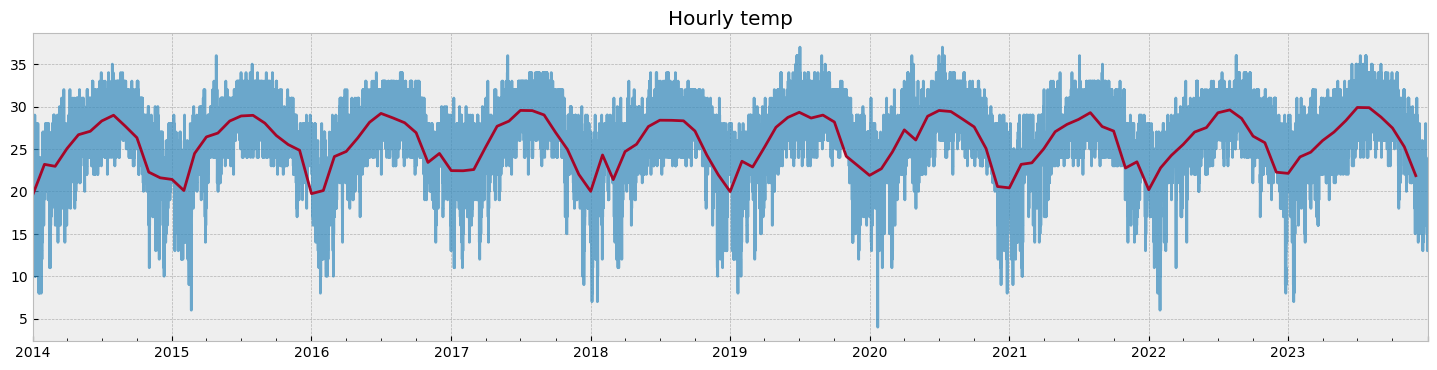

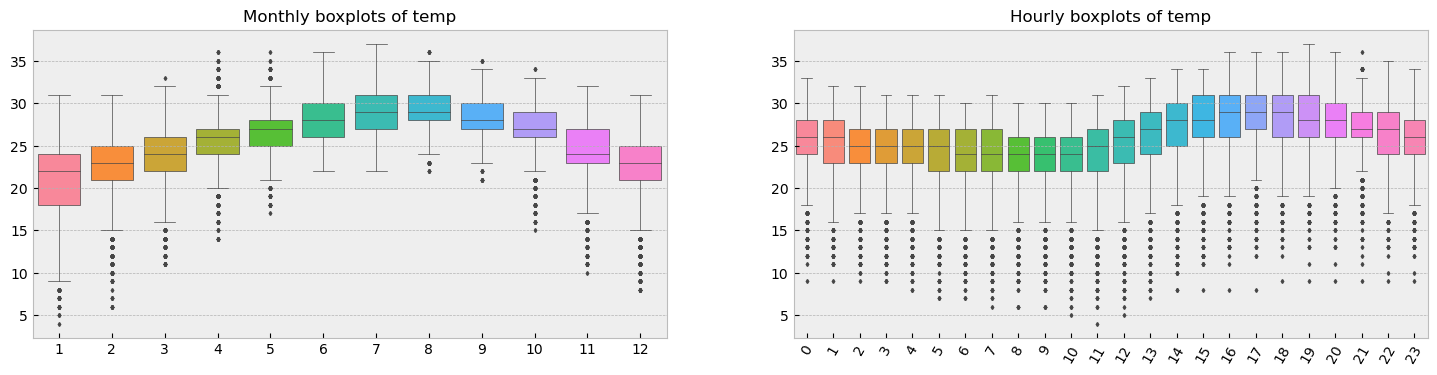

In [4]:
# plotting
i1 = 0
i2 = i1+24*3650

_, ax = plt.subplots(1,1, figsize = (18,4))
_ = df.set_index('time')[feat_target].plot(ax = ax, title = f'Hourly {feat_target}', xlabel = '', alpha = 0.7, kind = 'line')
_ = df.set_index('time')[feat_target].resample('M').mean().plot(ax = ax, xlabel = '')


_, ax = plt.subplots(1,2, figsize = (18,4))
feat = feat_target

###
# 1) plot
feat_dt = 'dt_month'
j = 0
df1 = df.groupby([feat_dt])[[feat]].mean()
# _ = df1.plot(ax = ax[j][0], title = f'Monthly average of {feat}', style = '-o', xlabel = '')

# 2) boxplot
p = sns.boxplot(x=df[feat_dt], y=df[feat], ax = ax[0], linewidth=0.5, saturation=1, fliersize = 2, palette=None)
_ = p.set_title(f'Monthly boxplots of {feat}', fontsize = 12)
_ = p.set_ylabel('')
_ = p.set_xlabel('')
_ = plt.xticks(rotation = 60)


###
# 1) plot
feat_dt = 'dt_hour'
j = 1
df1 = df.groupby([feat_dt])[[feat]].mean()
# _ = df1.plot(ax = ax[j][0], title = f'Hourly average of {feat}', style = '-o', xlabel = '')

# 2) boxplot
p = sns.boxplot(x=df[feat_dt], y=df[feat], ax = ax[1], linewidth=0.5, saturation=1, fliersize = 2, palette=None)
_ = p.set_title(f'Hourly boxplots of {feat}', fontsize = 12)
_ = p.set_ylabel('')
_ = p.set_xlabel('')
_ = plt.xticks(rotation = 60)

# plt.tight_layout()


### Xgboost regression model

In [5]:
feats_used   = [f for f in df.columns if f not in feats_target + ['time']]
# feats_used   = [f for f in df_all.columns if f not in feats_target and f.startswith(feat_target)] # only target related feats

# 1) create datasets
f1 = df.time <= '2022-12-31'
x,y   = df.loc[f1, feats_used], df.loc[f1, feat_target]
xt,yt = df.loc[~f1, feats_used], df.loc[~f1, feat_target]

print(x.shape, xt.shape)

(78816, 224) (8783, 224)


[0]	train-mae:2.98682	valid-mae:2.96337
[781]	train-mae:0.50946	valid-mae:0.58029


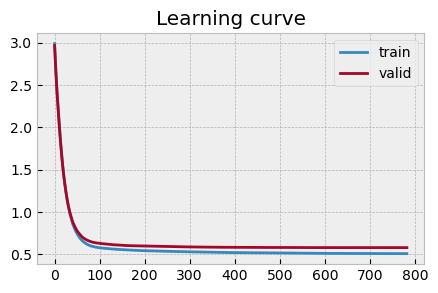

In [6]:
# 2) Training process
import xgboost as xgb

x_ = xgb.DMatrix(x.values, 
                label = y, 
                feature_names = feats_used)
xt_ = xgb.DMatrix(xt.values, 
                label = yt, 
                feature_names = feats_used) 

params = {
        'booster': 'gbtree',
        'tree_method': 'hist',
        'objective': 'reg:absoluteerror', 
        # 'eval_metric': 'logloss',
        'eta': 0.05,
        'max_depth': 5,  # -1 means no limit
        'subsample': 1,  # Subsample ratio of the training instance.
        'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree.
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': -1,
        'verbosity': 0
    }       

early_stopping_rounds = 100
num_boost_round       = 1000

evals_results = dict()
model_xgb = xgb.train(params, 
             x_, 
             evals=[
                 (x_,'train'), 
                 (xt_,'valid'),
             ], 
             evals_result=evals_results, 
             num_boost_round=num_boost_round,
             early_stopping_rounds=early_stopping_rounds,
             verbose_eval=1000)

# Learning curve
df_evals = pd.DataFrame({
            'train': evals_results['train']['mae'],
            'valid': evals_results['valid']['mae'],
})
_ = df_evals.plot(figsize = (5,3), title = 'Learning curve')

In [7]:
# # 3) predictions
# y_pred_last = xt[f'{feat_target}_lag1']
# y_pred = model_xgb.predict(xt_)
# if flg_round:
#     y_pred = y_pred.round()

# mape1 = 100*np.mean(np.abs((yt - y_pred_last) / yt))
# mape2 = 100*np.mean(np.abs((yt - y_pred) / yt))

# print(f'Last value MAPE:    {mape1:.2f}%')
# print(f'Xgboost Model MAPE: {mape2:.2f}%')

In [8]:
# 3) predictions
y_pred_last = xt[f'{feat_target}_lag1']
y_pred = model_xgb.predict(xt_)
if flg_round:
    y_pred = y_pred.round()

mape1 = np.mean(np.abs((yt - y_pred_last)))
mape2 = np.mean(np.abs((yt - y_pred)))

print(f'Last value MAE:    {mape1:.5f}')
print(f'Xgboost Model MAE: {mape2:.5f}')

Last value MAE:    0.70728
Xgboost Model MAE: 0.54856


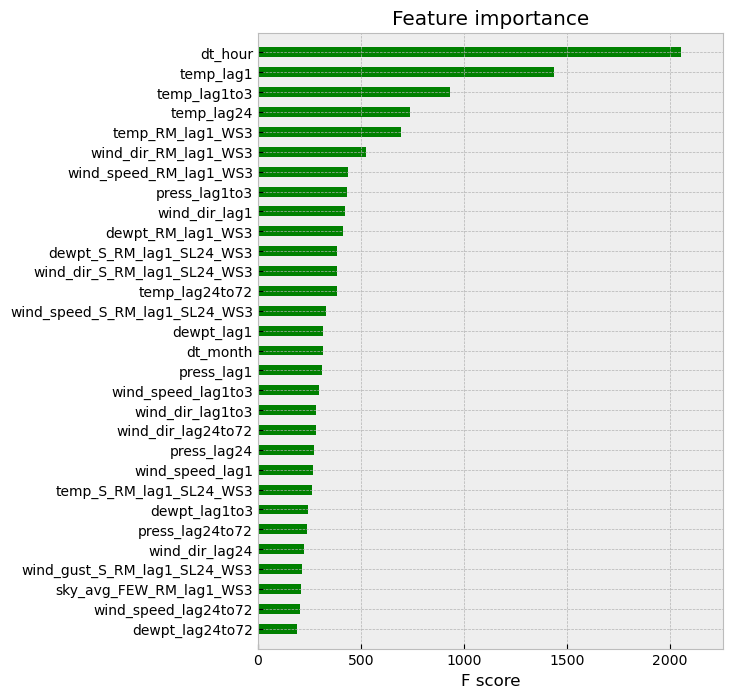

In [9]:
# Feature importances
_, ax = plt.subplots(1,1, figsize = (6,8))
_ = xgb.plot_importance(model_xgb, ax = ax, max_num_features=30, height=0.5, 
                        show_values=False, color = 'green', ylabel = '')
# plt.tight_layout()

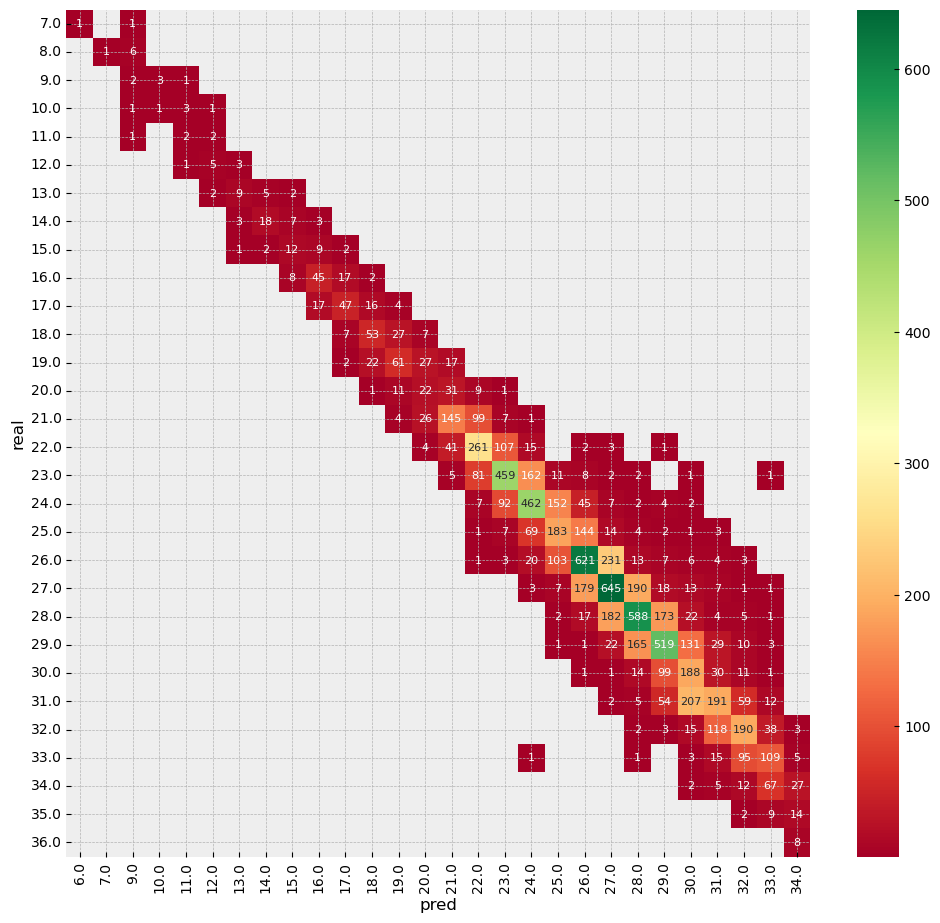

In [10]:
df_out = pd.DataFrame({
    'real': yt,
    'pred': y_pred,
})
df_corr = df_out.groupby(['real','pred']).size().unstack()

_, ax = plt.subplots(figsize = (12,11))
_ = sns.heatmap(df_corr, ax = ax, cmap = 'RdYlGn', annot = True, fmt = '.0f', annot_kws={"size": 8})


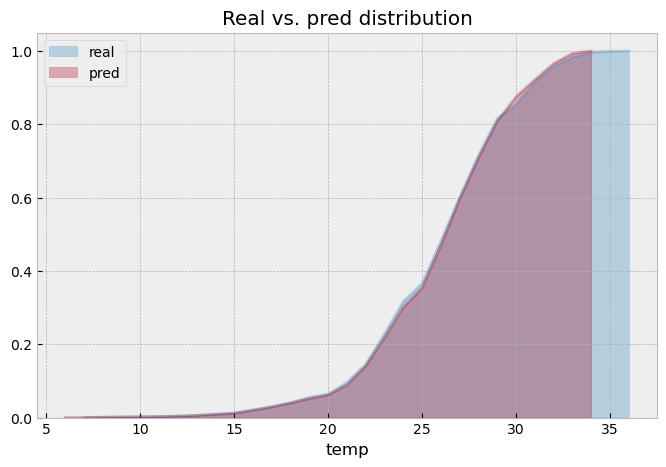

In [11]:
a = df_out.real.value_counts(normalize = True).sort_index().cumsum()
a.name = 'real'
a.plot(alpha = 0.3, kind = 'area', figsize = (8,5), legend = True, title = 'Real vs. pred distribution')
b = df_out.pred.value_counts(normalize = True).sort_index().cumsum()
b.name = 'pred'
_ = b.plot(alpha = 0.3, kind = 'area', legend = True, xlabel = feat_target)

In [12]:
model_xgb.save_model(f'models/{feat_target}.pkl')
model_xgb2 = xgb.Booster(model_file = f'models/{feat_target}.pkl')